**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 
* Choose best model

## 1) Problem statement.

* OFLC gives job certification applications for employers seeking to bring foreign workers into the foreign Country and grants certifications. 
* As In last year the count of employees were huge so OFLC needs Machine learning models to shortlist visa applicants based on their previous data.

**In this project we are going to use the data given to build a Classification model:**

* This model is to check if Visa get approved or not based on the given dataset.
* This can be used to Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the certain criteria which influences the decision.

## 2) Data Collection.
* The Dataset is part of Office of Foreign Labor Certification (OFLC)
* The data consists of 25480 Rows and 12 Columns

https://www.kaggle.com/datasets/moro23/easyvisa-dataset


### 2.1 Import Data and Required Packages

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

**Import the CSV Data as Pandas DataFrame**

In [3]:
data = pd.read_csv('Visadataset.csv')
data.head(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified


**Shape of the DataFrame**

In [4]:
data.shape

(25480, 12)

**Distribution of Target Variable**

In [5]:
data.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


**Check datatypes in the dataset**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


## 3) Exploratory Data Analysis

**Define numerical and categorical columns**

In [7]:
numerical_cols = [ colname for colname in data.columns if data[colname].dtypes != "O"]
categorical_columns = [ colname for colname in data.columns if data[colname].dtypes == "O"]

print(f"numerical_cols:{numerical_cols}")
print(f"categorical_columns:{categorical_columns}")

numerical_cols:['no_of_employees', 'yr_of_estab', 'prevailing_wage']
categorical_columns:['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [8]:
for col in data.columns:
    print(data[col].value_counts(normalize=100)*100)
    

case_id
EZYV01       0.003925
EZYV02       0.003925
EZYV03       0.003925
EZYV04       0.003925
EZYV05       0.003925
               ...   
EZYV25476    0.003925
EZYV25477    0.003925
EZYV25478    0.003925
EZYV25479    0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
no_of_employees
183      0.070644
854      0.062794
724      0.062794
1476     0.058870
766      0.058870
           ...   
3711     0.003925
16399    0.003925
4600     0.0039

**Insights**
 - `case_id` have unique vlaues for each column which can be dropped as it it of no importance
 - `continent` column is highly biased towards asia. hence we can combine other categories to form a single category.
 - `unit_of_wage` seems to be an important column as most of them are yearly contracts.
 - `full_time_position` column is also biased towards Y category.
 - `employer_state` column has many unique values which can be grouped based on regions.

### Univariate Analysis ###

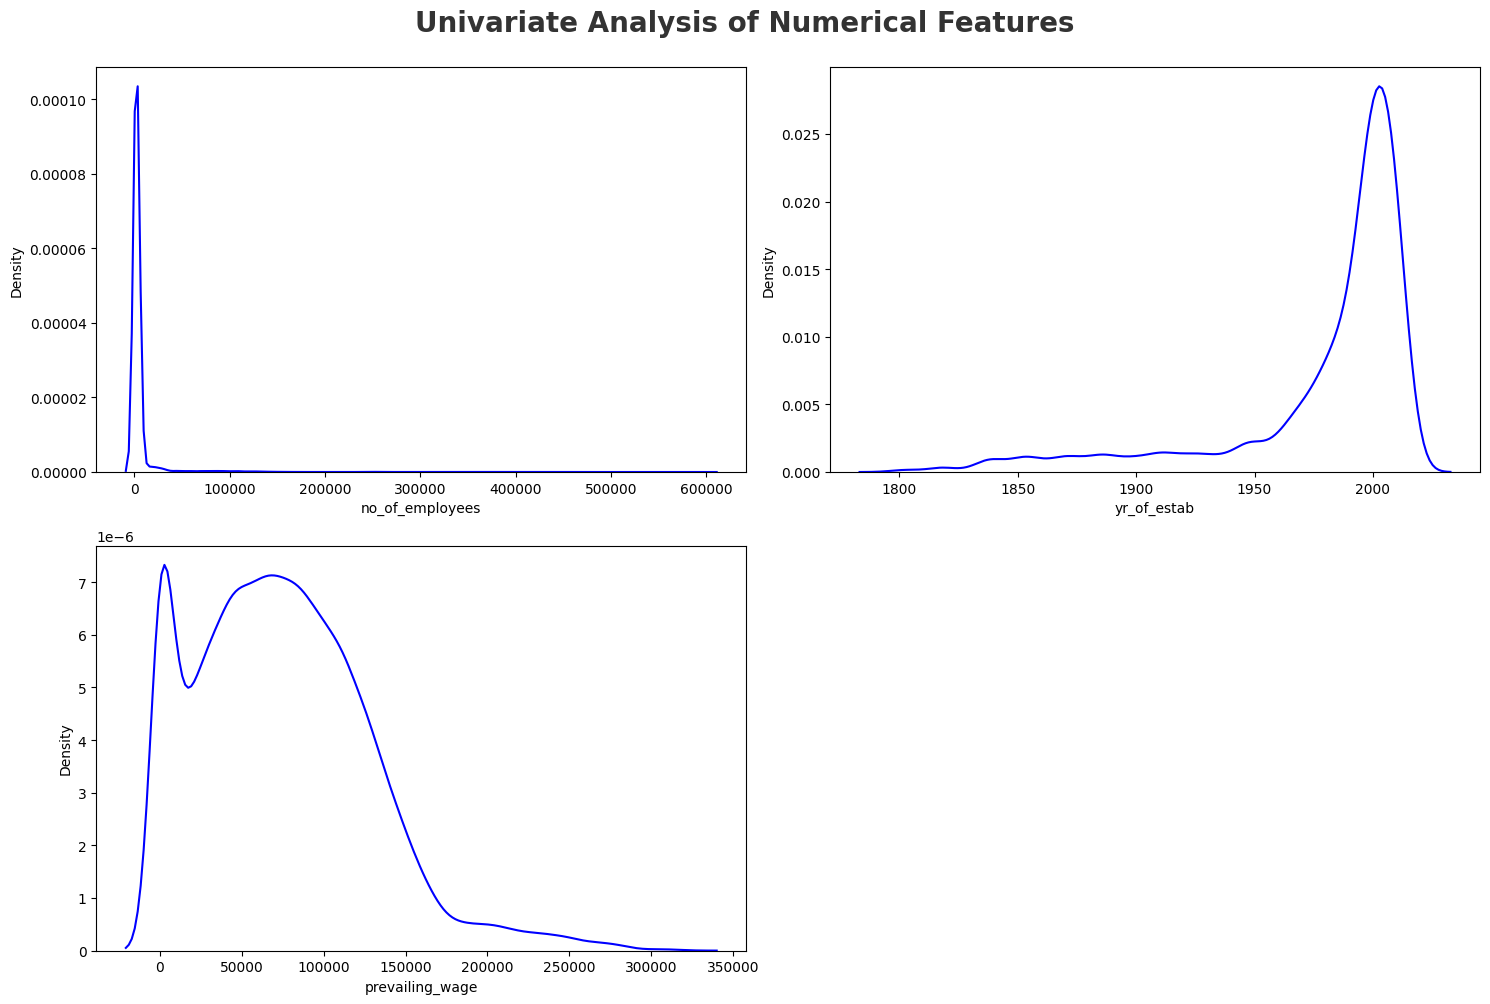

In [9]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_cols)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=data[numerical_cols[i]], color='blue')
    plt.xlabel(numerical_cols[i])
    plt.tight_layout()

**Insights**
 - `no_of_employees` column looks more skewed but it may be because of outliers.
 - `yr_of_estab` is a discrete feature.
 - `privailing-wage` is a right-skewed distribution.

### Categorical Features ###

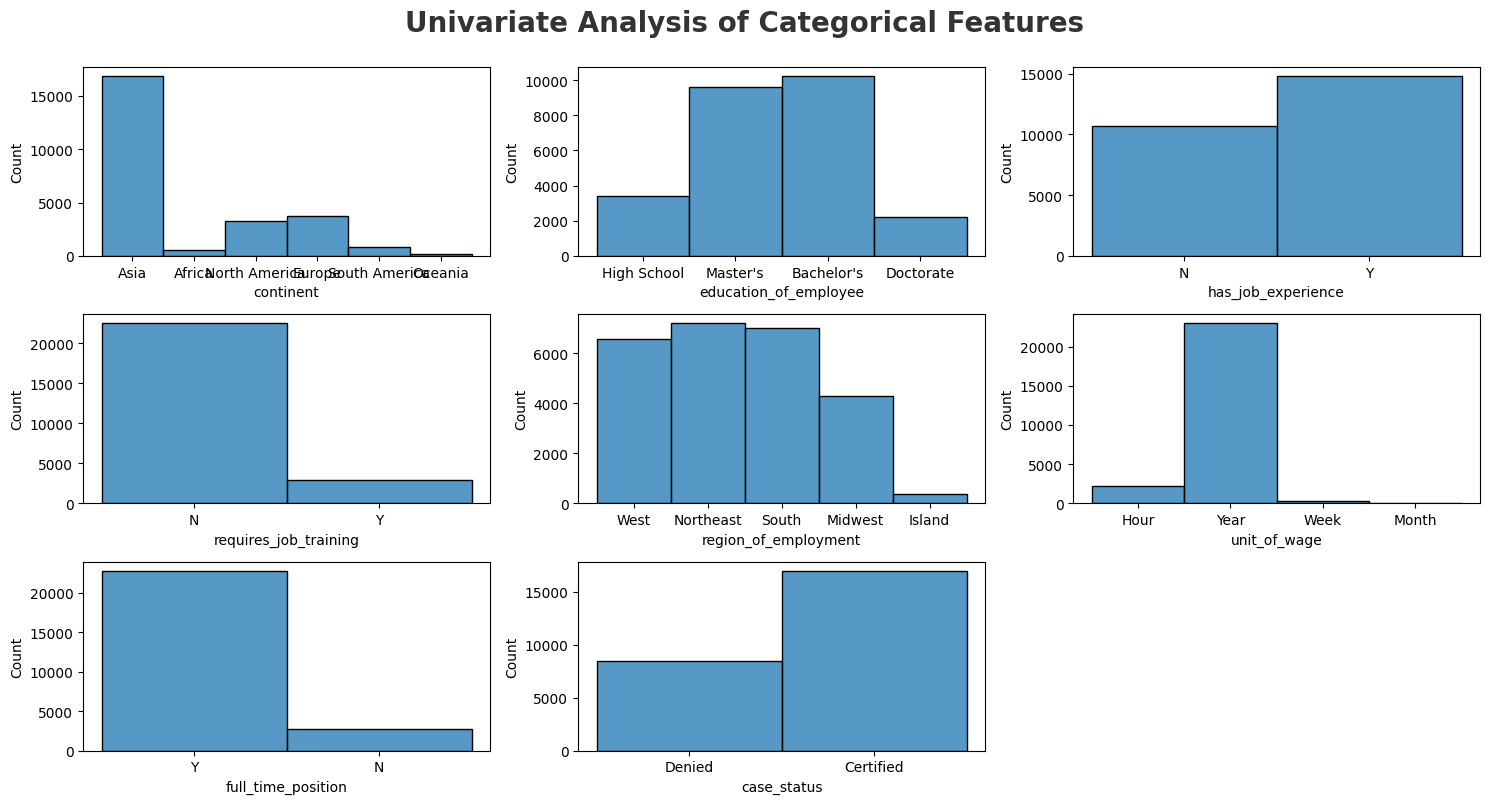

In [13]:
# categorical columns
# categorical_columns.remove('case_id')
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_columns)):
    plt.subplot(3, 3, i+1)
    sns.histplot(x=data[categorical_columns[i]])
    plt.xlabel(categorical_columns[i])
    plt.tight_layout()

**Insights**
 - `requires_job_training`, `unit_of_wage`, `full_time_position` and `continents` coulmns have signle category dominating.
 - In rest of the columns are balanced.

### Multi Variate Analysis ###

In [14]:
discrete_features=[feature for feature in numerical_cols if len(data[feature].unique())<=25]
continuous_features=[feature for feature in numerical_cols if len(data[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 0 discrete features : []

We have 3 continuous_features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


### Check Collinearity for Numerical Features ###

**Pearson Correlation**
- |correlation| > 0.8 → potential multicollinearity
- |correlation| > 0.9 → strong multicollinearity

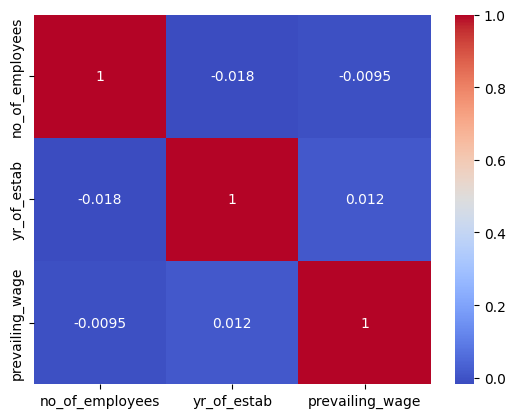

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data[numerical_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

**Variance Inflation Factor**
- VIF measures how much variance of a coefficient is inflated due to correlation with other features.
- VIF 1 - No Multicollinearity
- VIF 1-5 - Moderate
- VIF 5-10 - High
- VIF >10 - Severe - Remove the feature


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = data[numerical_cols]

vif_df = pd.DataFrame()
vif_df['feature'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_df


,feature,VIF
0,no_of_employees,1.061216
1,yr_of_estab,3.054392
2,prevailing_wage,2.987137


**Pairplot Check**

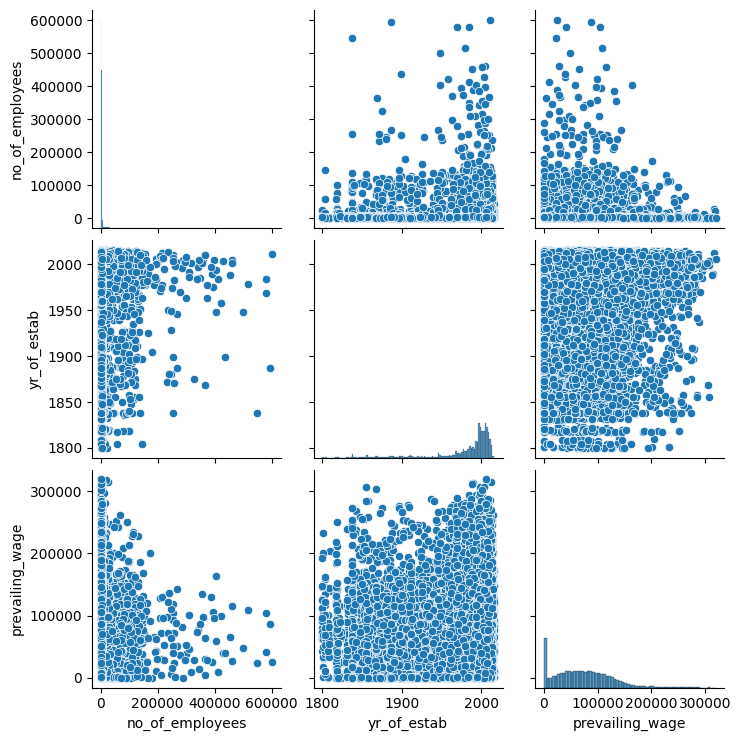

In [20]:
sns.pairplot(data[numerical_cols])

### Check Multicollinearity on Categorical Columns ###

* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e case_status**

Null Hypothesis ($ H_0 $): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis ($ H_1 $): The Feature and Target column are not independent (Correalted)

In [26]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_columns:
    if chi2_contingency(pd.crosstab(data['case_status'], data[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis - Feature & Target are dependent')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis - Feature & Target are independent')
result = pd.DataFrame(data=[categorical_columns, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,continent,Reject Null Hypothesis - Feature & Target are ...
1,education_of_employee,Reject Null Hypothesis - Feature & Target are ...
2,has_job_experience,Reject Null Hypothesis - Feature & Target are ...
3,requires_job_training,Fail to Reject Null Hypothesis - Feature & Tar...
4,region_of_employment,Reject Null Hypothesis - Feature & Target are ...
5,unit_of_wage,Reject Null Hypothesis - Feature & Target are ...
6,full_time_position,Reject Null Hypothesis - Feature & Target are ...
7,case_status,Reject Null Hypothesis - Feature & Target are ...


In [28]:
aa = pd.crosstab(data['case_status'], data['education_of_employee'])
print(aa)

education_of_employee  Bachelor's  Doctorate  High School  Master's
case_status                                                        
Certified                    6367       1912         1164      7575
Denied                       3867        280         2256      2059
